In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
diabetes = pd.read_csv('diabetes.csv')
diabetes['Diabetes_012'] = diabetes["Diabetes_012"].replace({0: 0, 1: 1, 2: 1})

In [3]:
parameters = ['HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk', 'Diabetes_012']
key_diabetes = diabetes[parameters]

In [4]:
X = key_diabetes.drop(columns = 'Diabetes_012', axis=1)
X = X - X.min() # this turns minimum value of each column to 0
ranges = X.max() - X.min() # calculate the range per column
X = X/ranges # this turns maximum value to 1

y = key_diabetes['Diabetes_012']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

Text(0, 0.5, 'Accuracy')

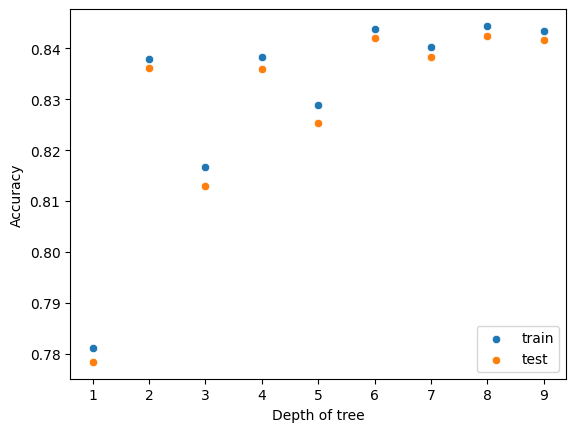

In [6]:
size = range(1, 10)
train_scores = []
test_scores = []

for k in size:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

fig, ax = plt.subplots(1)
sns.scatterplot(x=size, y=train_scores, label='train')
sns.scatterplot(x=size, y=test_scores, label='test')
ax.set_xlabel('Depth of tree')
ax.set_ylabel('Accuracy')

In [7]:
def confusionMatrix (X_test, y_test):
    y_test_pred = knn.predict(X_test)

    cm = confusion_matrix(y_test, y_test_pred, labels=[1, 0])

    TP = cm[0, 0]
    FN = cm[0, 1]
    FP = cm[1, 0]
    TN = cm[1, 1]

    TPR = TP / (TP + FN)  
    FPR = FP / (FP + TN)  
    FNR = FN / (FN + TP)
    precision = TP / (TP + FP)

    print("Confusion Matrix:")
    print(cm)
    print("True Positive Rate (TPR): " + str(TPR))
    print("False Positive Rate (FPR): " + str(FPR))
    print("False Negative Rate (FNR): " + str(FNR))
    print("Precision: " + str(precision))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'], yticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'])
    plt.title('Confusion Matrix for Diabetes Prediction')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

Confusion Matrix:
[[ 1775  6163]
 [ 1874 40924]]
True Positive Rate (TPR): 0.2236079617031998
False Positive Rate (FPR): 0.0437870928548063
False Negative Rate (FNR): 0.7763920382968001
Precision: 0.48643463962729516


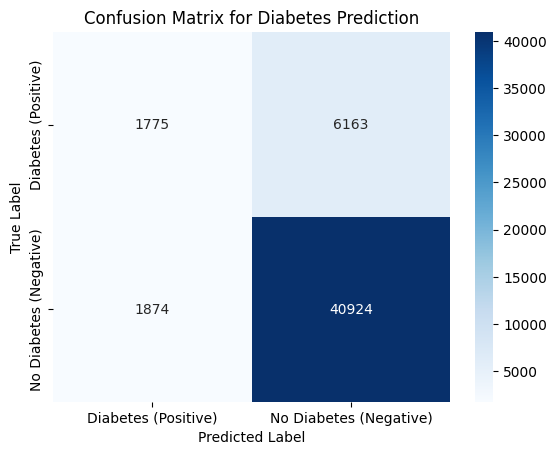

In [8]:
confusionMatrix(X_test, y_test)

In [9]:
smote = SMOTE()
X_res, y_res = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state = 1)

print(y_train.value_counts())

Diabetes_012
0.0    171078
1.0    170846
Name: count, dtype: int64


Text(0, 0.5, 'Accuracy')

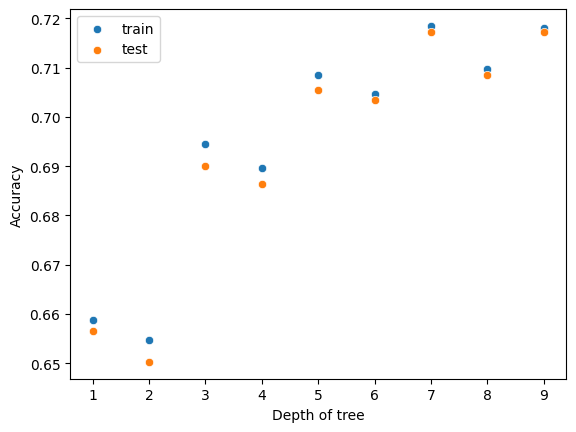

In [10]:
size = range(1, 10)
train_scores = []
test_scores = []

for k in size:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

fig, ax = plt.subplots(1)
sns.scatterplot(x=size, y=train_scores, label='train')
sns.scatterplot(x=size, y=test_scores, label='test')
ax.set_xlabel('Depth of tree')
ax.set_ylabel('Accuracy')

In [11]:
def confusionMatrix (X_test, y_test):
    y_test_pred = knn.predict(X_test)

    cm = confusion_matrix(y_test, y_test_pred, labels=[1, 0])

    TP = cm[0, 0]
    FN = cm[0, 1]
    FP = cm[1, 0]
    TN = cm[1, 1]

    TPR = TP / (TP + FN)  
    FPR = FP / (FP + TN)  
    FNR = FN / (FN + TP)
    precision = TP / (TP + FP)

    print("Confusion Matrix:")
    print(cm)
    print("True Positive Rate (TPR): " + str(TPR))
    print("False Positive Rate (FPR): " + str(FPR))
    print("False Negative Rate (FNR): " + str(FNR))
    print("Precision: " + str(precision))

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'], yticklabels=['Diabetes (Positive)', 'No Diabetes (Negative)'])
    plt.title('Confusion Matrix for Diabetes Prediction')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')